## Logistic Regression


- Logistic regression solves classification problems.
- It predicts categorical outcomes
- Linear regression predicts a continuous outcome.
 


In [8]:
a = np.arange(8)
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
b = np.reshape(a,[4,2])
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [11]:
c = np.reshape(b,[2,4])
c

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [12]:
d = np.reshape(c,-1)
d

array([0, 1, 2, 3, 4, 5, 6, 7])

In [6]:
#Numpy Reshaping
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

newarr = arr.reshape(4, 3)

print(newarr)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [7]:
#1-D array into a 3-D array.

import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#outermost dimension will have 2 arrays that contains 3 arrays, each with 2 elements
newarr = arr.reshape(2, 3, 2)
print(newarr)


[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]


In [23]:
#-1 flattens an array of any dimensions to a 1D array. 
A = np.array([[4,2],[6,5], [4,3]])
B=A.reshape(-1)
B

array([4, 2, 6, 5, 4, 3])

In [30]:
#basic logistic regression to predict a binomial variable.

import numpy
from sklearn import linear_model

#Reshape for Logistic function.
#X is independent variable
#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#y is dependent variable
#y tells whether the tumor is cancerous or no (0:No, 1:Yes).

y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X

array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

In [31]:
y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [32]:

#use LogisticRegression() method in sklearn module to create a logistic regression object.

#call fit() method with independent and dependent values 
# X, y as parameters to fills the regression object with data

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous if the size is 3.46mm

predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)


[0]


In [36]:
predicted = logr.predict(numpy.array([6.46]).reshape(-1,1))
print(predicted)

[1]


## Coefficient

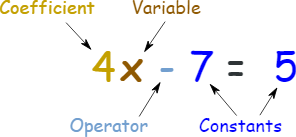

## Coefficient
- A number used to multiply a variable.
- 4x means 4 times x, and "x" is a variable, 4 is the coefficient.
- Variables with no number have a coefficient of 1.
- X=7, coefficient is 1
- Sometimes a letter stands in for the number
- ax<sup>2</sup> + bx + c, "x" is a variable, and "a" and "b" are coefficients.


- coefficients are the values that multiply the predictor values. 
- in y = 3X + 5, +3 is the coefficient
- X is the predictor
- +5 is the constant.
- positive coefficient indicates that as the predictor increases, the response variable also increases.
- negative coefficient indicates that as the predictor increases, the response variable decreases.



In [37]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]


### Probability
- We can use coefficient and intercept values to find the probability of a tumor is cancerous or not.
-Function to return probability for each of the coefficient and intercept values

In [39]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

p=logit2prob(logr, X)

print(p)

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [46]:
# Use concatenate() to join two arrays
T = np.concatenate((X, p), axis=1)
print(T)

[[3.78       0.60749955]
 [2.44       0.19268876]
 [2.09       0.12775886]
 [0.14       0.00955221]
 [1.72       0.08038616]
 [1.65       0.07345637]
 [4.92       0.88362743]
 [4.37       0.77901378]
 [4.96       0.88924409]
 [4.52       0.81293497]
 [3.69       0.57719129]
 [5.88       0.96664243]]


- 3.78 0.61 The probability that a tumor with the size 3.78cm is cancerous is 61%.

- 2.44 0.19 The probability that a tumor with the size 2.44cm is cancerous is 19%.

- 2.09 0.13 The probability that a tumor with the size 2.09cm is cancerous is 13%.